In [1]:
# importing the required libraries
import pandas  as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# reading the dataset 
data = pd.read_csv('a1_d1.csv')

# separating the given data into class 0 and class 1 
data_class0 = data.loc[data['class']==0]
data_class1 = data.loc[data['class']==1]

#train test split on class 0 and class1 data
train0 = data_class0.sample(frac=0.8,random_state=200) #random state is a seed value
test0 = data_class0.drop(train0.index)

train1 = data_class1.sample(frac=0.8,random_state=200) #random state is a seed value
test1 = data_class1.drop(train1.index)

# appending individual train and test sets
train = train0.append(train1)
test = test0.append(test1) 

In [3]:
# finding the mean 
m0 = [np.mean(train0.iloc[:,0]),np.mean(train0.iloc[:,1])]
m1 = [np.mean(train1.iloc[:,0]),np.mean(train1.iloc[:,1])]

#  within class covariance matrices
cov0 = np.cov(train0.iloc[:,0],train0.iloc[:,1])
cov1 = np.cov(train1.iloc[:,0],train1.iloc[:,1])

sw = cov0 + cov1
isw = np.linalg.inv(sw) #inverse of sw

#difference of means of two classes
m = np.asarray(m0)-np.asarray(m1)

# w is the vector used for collapsing and classifying
w = np.dot(isw,np.transpose(m))


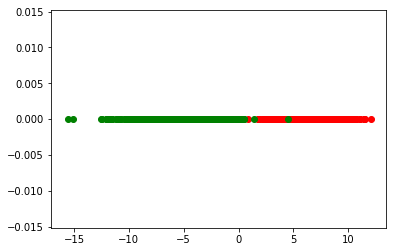

In [4]:
# collapsing all class 0 poinnts on w
collapse0 = []
for i in range(train0.shape[0]):
    collapse0.append(np.dot(w,[train0.iloc[i,0],train0.iloc[i,1]]))

collapse1 = []
for i in range(train1.shape[0]):
    collapse1.append(np.dot(w,[train1.iloc[i,0],train1.iloc[i,1]]))

#plotting the collapsed points
plt.scatter(collapse0,[0]*train0.shape[0],color='red')
plt.scatter(collapse1,[0]*train1.shape[0],color='g')
plt.show()

Text(-15, 0.14, 'mean = -6.11,  std = 2.84')

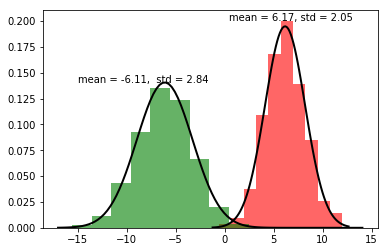

In [5]:
# fitting normal distribution to the collapsed points of both the classes
mean0,std0 = norm.fit(collapse0)
plt.hist(collapse0, bins=10, density=True, alpha=0.6, color='r')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean0, std0)
plt.plot(x, p, 'k', linewidth=2)
title = "mean = %.2f, std = %.2f" % (mean0, std0)
plt.text(0.5,0.2,title)

mean1,std1 = norm.fit(collapse1)
plt.hist(collapse1, bins=10, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean1, std1)
plt.plot(x, p, 'k', linewidth=2)
title = "mean = %.2f,  std = %.2f" % (mean1, std1)
plt.text(-15,0.14,title)

[38.15229031  0.87141266]


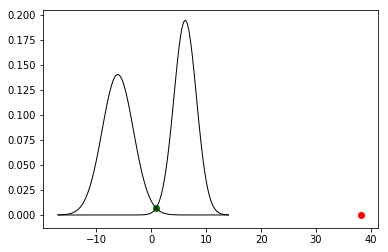

In [6]:
"""
finding the intersection point by equating the normal distributions 
a,b,c are the coeffs of the quadratic eqn
"""
a = 1/(2*std0**2) - 1/(2*std1**2)
b = mean1/(std1**2) - mean0/(std0**2)
c = mean0**2 /(2*std0**2) - mean1**2 / (2*std1**2) - np.log(std1/std0)
pt_intersect = np.roots([a,b,c])
print(pt_intersect)

p = norm.pdf(x, mean0, std0)
plt.plot(x, p, 'k', linewidth=1)
p = norm.pdf(x, mean1, std1)
plt.plot(x, p, 'k', linewidth=1)
plt.scatter(pt_intersect[1],norm.pdf(pt_intersect[1],mean1,std1),color='green')
plt.scatter(pt_intersect[0],norm.pdf(pt_intersect[0],mean1,std1),color='red')

In [7]:
# from the visualization the discriminating pt is x = 0.8394799
yactual = [int(i) for i in test.iloc[:,2]]
pred=[]
for i in range(test.shape[0]):
    proj = np.dot(w,test.iloc[i,[0,1]])
    if proj<=pt_intersect[1]:
        pred.append(1)
    else:
        pred.append(0)

In [10]:
y_actu = pd.Series(yactual, name='Actual')
y_pred = pd.Series(pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

# calculating the precision and recall to calculate F score 
p = df_confusion.loc[0,0]/(df_confusion.loc[0,0]+df_confusion.loc[1,0])
r = df_confusion.loc[0,0]/(df_confusion.loc[0,0]+df_confusion.loc[0,1])
print(df_confusion)

Predicted    0   1
Actual            
0          100   0
1            2  98


In [9]:
acc = (df_confusion.loc[0,0]+df_confusion.loc[1,1])/(df_confusion.loc[0,0]+df_confusion.loc[1,1]+df_confusion.loc[0,1]+df_confusion.loc[1,0])
f_score = 2*p*r/(p+r)
print(acc,f_score)

0.99 0.99009900990099
